# Previsão de Renda

In [1]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Descrição da atividade

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

### Carregamento e tratamento dos dados

In [10]:
arquivo = 'previsao_de_renda.csv'
    
df = pd.read_csv(arquivo, na_values=('na', 'NaN', 'nan'))

# remove a colunas: a primeira coluna, e a coluna sexo do arquivo csv
df = df.iloc[: , 1:].drop('sexo', axis=1)

In [3]:
df.head()

,data_ref,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [11]:
# converte a coluna data_ref em datetime e cria as colunas 'ano', 'mes'

df['data_ref'] = pd.to_datetime(df['data_ref'])
df['ano'] = df['data_ref'].dt.year
df['mes'] = df['data_ref'].dt.month

### **Será apenas avaliado o ano de 2015, por completeza**

In [12]:
df_2015 = df[df['ano'] == 2015]

# checa se há variáveis missings

df_2015.isna().any()

data_ref                 False
index                    False
posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego             True
qt_pessoas_residencia    False
mau                      False
renda                    False
ano                      False
mes                      False
dtype: bool

In [13]:
# calcula a porcentagem de valores faltantes

print(f'Porcentagem de dados faltantes: {round((df_2015.dropna().shape[0]/df_2015.shape[0])*100,2)}%')

Porcentagem de dados faltantes: 82.94%


In [14]:
# Como a quantidade de linhas que possuem dados faltantes é muito grande, a coluna será removida

df_2015 = df_2015.drop('tempo_emprego',axis=1)

In [15]:
# cria um df de dummies
# drop das colunas 'ano' e 'mês' para a variáveis dummies

dummies = ['posse_de_veiculo', 'posse_de_imovel','mau']

df_dummies = pd.get_dummies(df_2015, 
                            columns=['posse_de_veiculo', 'posse_de_imovel', 'mau'], 
                            drop_first=True).drop(columns=['ano', 'mes'])
df_dummies.head()

,data_ref,index,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,qt_pessoas_residencia,renda,posse_de_veiculo_True,posse_de_imovel_True,mau_True
0,2015-01-01,8682,1,Assalariado,Secundário,Casado,Casa,36,3.0,3369.24,0,1,0
1,2015-01-01,12830,0,Empresário,Secundário,Casado,Casa,42,2.0,6096.14,1,1,0
2,2015-01-01,2885,2,Assalariado,Superior completo,Casado,Casa,31,4.0,5658.98,1,1,0
3,2015-01-01,16168,0,Empresário,Secundário,Casado,Casa,50,2.0,7246.69,1,0,0
4,2015-01-01,12438,0,Assalariado,Secundário,Casado,Casa,52,2.0,4017.37,0,0,0


/tmp/ipykernel_23310/3071283959.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_dummies.corr(), figsize=(10, 10), center = 0, cmap=cmap)


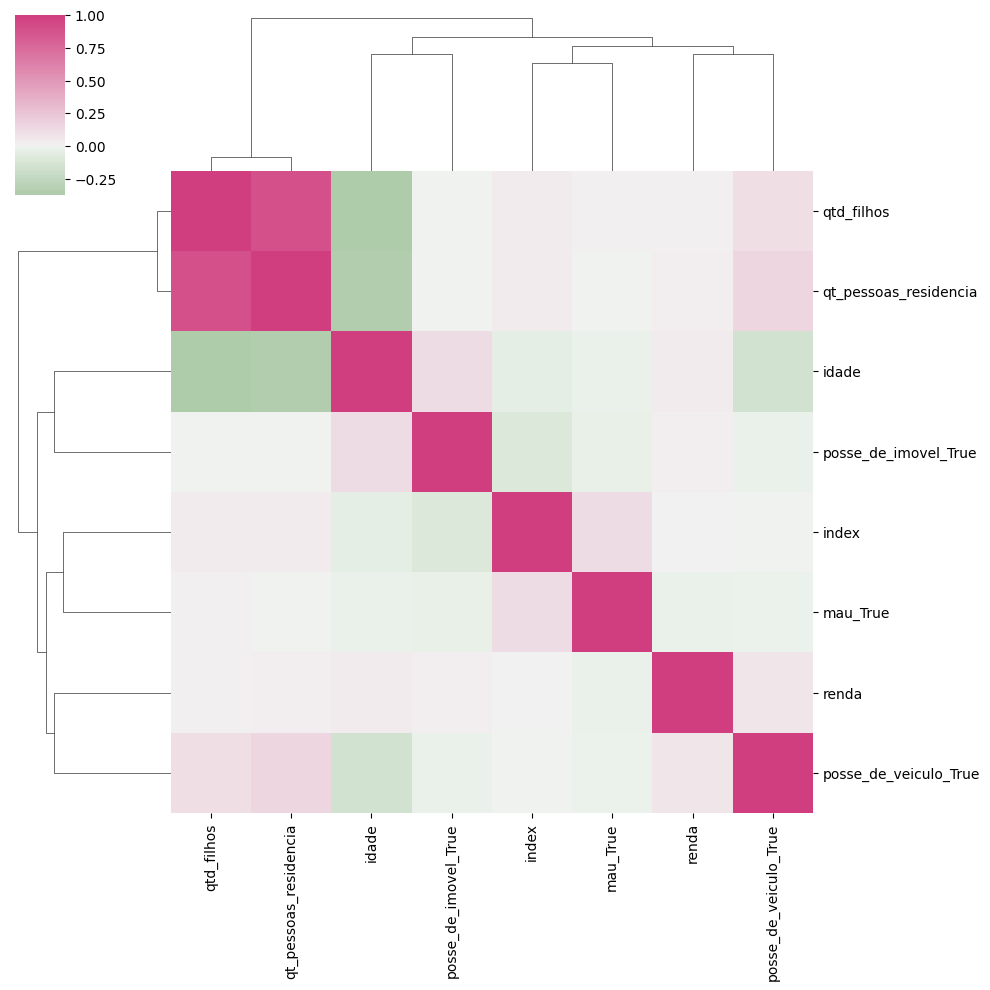

In [16]:
# analisando a matrix de correlação através de um heatmap

# o parâmetro sep foi posto em 15 para visualizar melhor as correlações
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, center = 'light')

sns.clustermap(df_dummies.corr(), figsize=(10, 10), center = 0, cmap=cmap)

As maiores correlações são entre posse de veículo, posse de imóvel, idade e renda.

Renda e posse de veículo são a relação mais direta, indicando que possuir um automóvel indicar maior renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

### Usando apenas as variáveis numéricas (ou dummies), os clientes serão agrupados pelo seu index. Já que, a solicitação de crédito pode ter sido feita ao longo de diferentes meses do ano. Logo, a média será tirada.

In [26]:
df_index_2015 = df_dummies.groupby(by='index').mean()
df_index_2015.head()

/tmp/ipykernel_23310/2566832096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_index_2015 = df_dummies.groupby(by='index').mean()


,qtd_filhos,idade,qt_pessoas_residencia,renda,posse_de_veiculo_True,posse_de_imovel_True,mau_True
index,,,,,,,
0,0.0,58.0,2.0,10838.65,1.0,1.0,0.0
1,0.0,52.0,1.0,6184.10,0.0,1.0,0.0
3,0.0,46.0,2.0,6450.48,1.0,1.0,0.0
4,0.0,29.0,2.0,2199.27,1.0,0.0,0.0
5,0.0,29.0,2.0,1575.67,1.0,0.0,0.0


In [25]:
#verificando a nova dimensão da base agrupada pelo index de cada cliente
df_index_2015.shape

(8526, 9)

In [27]:
# plotando a matriz de correlação para o agrupamento de index

df_index_2015.corr()

,qtd_filhos,idade,qt_pessoas_residencia,renda,posse_de_veiculo_True,posse_de_imovel_True,mau_True
qtd_filhos,1.000000,-0.379854,0.893562,0.013936,0.117235,-0.008252,0.002271
idade,-0.379854,1.000000,-0.351104,0.032735,-0.168252,0.122911,-0.006000
qt_pessoas_residencia,0.893562,-0.351104,1.000000,0.024808,0.159637,-0.013500,-0.013262
renda,0.013936,0.032735,0.024808,1.000000,0.059526,0.020343,-0.012644
posse_de_veiculo_True,0.117235,-0.168252,0.159637,0.059526,1.000000,-0.019570,-0.014640
posse_de_imovel_True,-0.008252,0.122911,-0.013500,0.020343,-0.019570,1.000000,-0.029103
mau_True,0.002271,-0.006000,-0.013262,-0.012644,-0.014640,-0.029103,1.000000


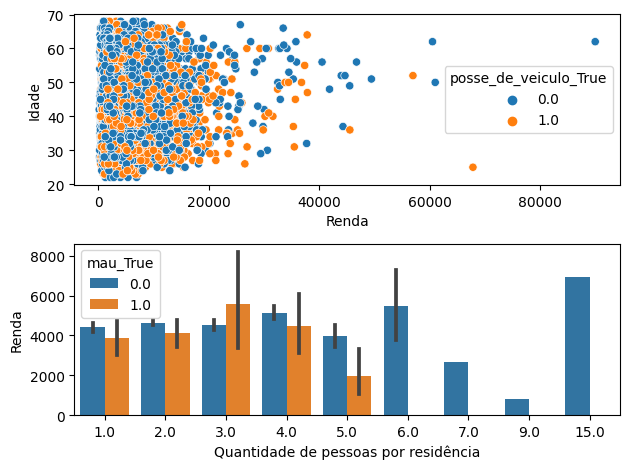

In [48]:
fig, axs = plt.subplots(nrows=2)

sns.scatterplot(data=df_index_2015, 
                x='renda',
                y='idade',
                hue='posse_de_veiculo_True',
                ax=axs[0])

axs[0].set_ylabel('Idade')
axs[0].set_xlabel('Renda')
                
sns.barplot(data=df_index_2015,
             x='qt_pessoas_residencia',
             y='renda',
             hue='mau_True',
             ax=axs[1])

axs[1].set_ylabel('Renda')
axs[1].set_xlabel('Quantidade de pessoas por residência')

plt.tight_layout()

#### Baseado nos gráficos acima, e utilizando a posse de veículos como variável correlacionada com renda, é possível observar que:

i) A distribuição de renda é maior para algumas pessoas de maior idade. E que o fator ter um veículo, observando o scatterplot, não indica ser um diferencial. Ver análise abaixo.

ii) A quantidade de pessoas na residência indica que se há mais de 6 pessoas, então as chances do cliente ser defaul são quase nulas.

3) Na sua aopinião, há outliers na variável renda?

In [53]:
# verifica a existência de rendas negativas, que seriam outliers

df_index_2015[df_index_2015['renda'] < 0].count()

qtd_filhos               0
idade                    0
qt_pessoas_residencia    0
renda                    0
posse_de_veiculo_True    0
posse_de_imovel_True     0
mau_True                 0
dtype: int64

Text(0.5, 1.0, 'Boxplot')

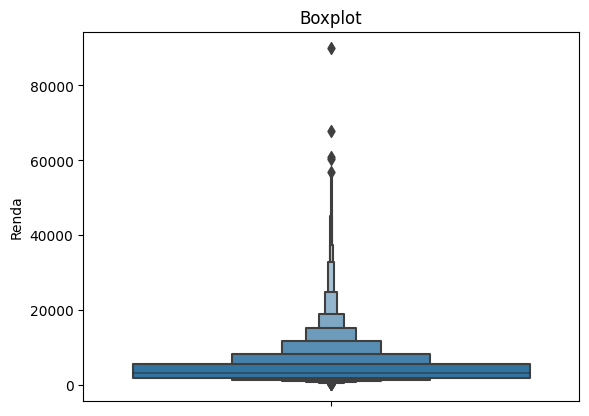

In [51]:
sns.boxenplot(data=df_index_2015, y='renda')
plt.ylabel('Renda')
plt.title('Boxplot')

De acordo com o boxplot, sim, há outliers de renda. Contudo, pela natureza da variável, não podemos desconsiderar nenhum valor. Pode ocorrer do cliente apenas ter uma renda alta. Isto é observado em conjunto com os outros parâmetros.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

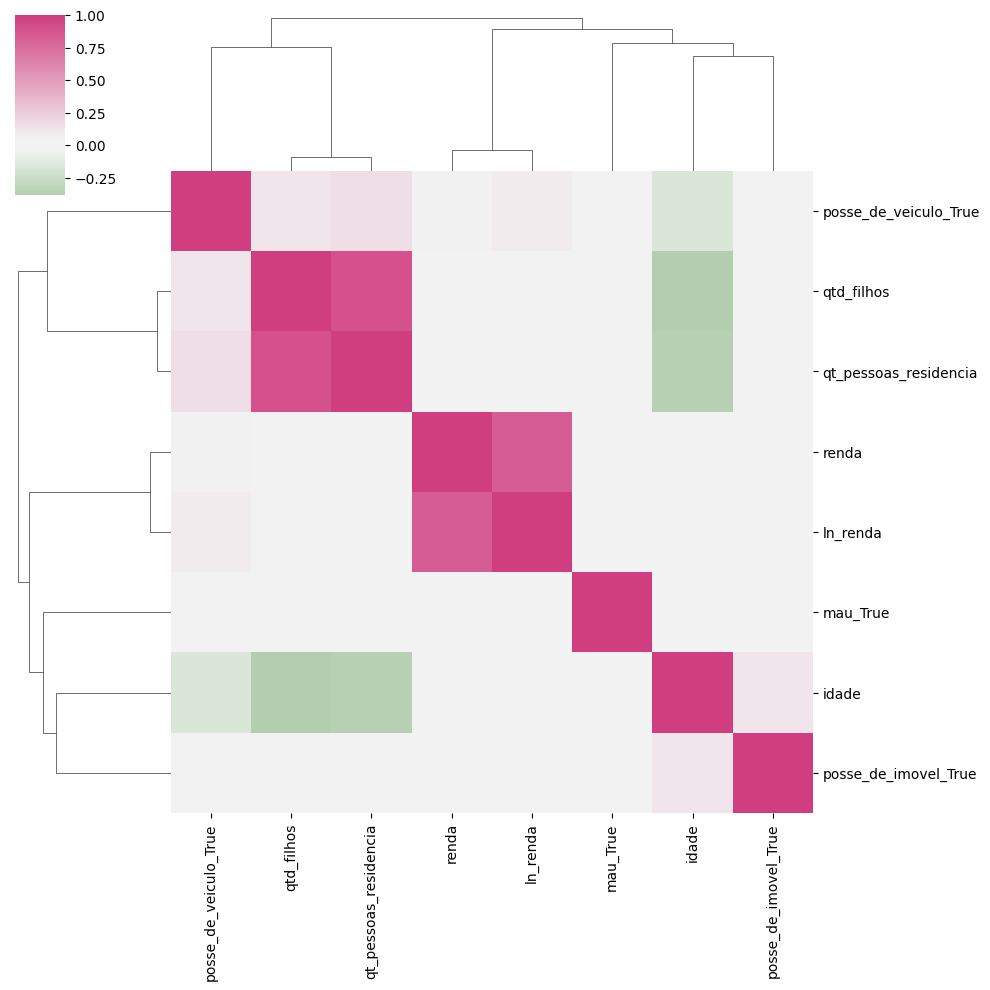

In [64]:
# analisando a matrix de correlação para o ln através de um heatmap

df_dummies_ln = df_index_2015.copy()

df_dummies_ln['ln_renda'] = np.log(df_dummies_ln['renda'])

# o parâmetro sep foi posto em 15 para visualizar melhor as correlações
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 15, center = 'light')

sns.clustermap(df_dummies_ln.corr(), figsize=(10, 10), center = 0, cmap=cmap)

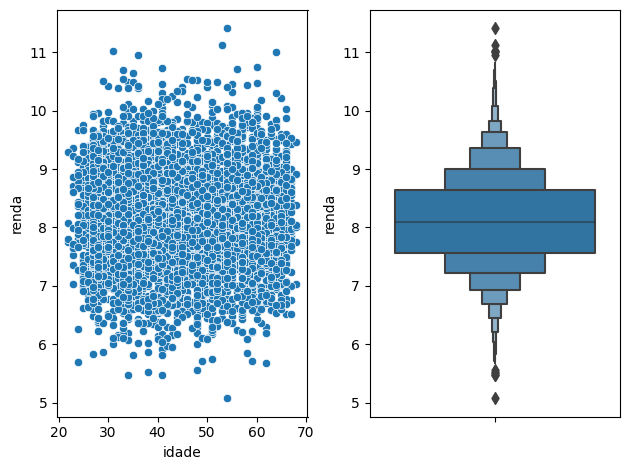

In [65]:
figs,axs =  plt.subplots(ncols=2)
renda_log = np.log(df_dummies['renda'])
variaveis = ['idade']

sns.scatterplot(data=df_dummies_ln, 
                x=var,
                y=renda_log,
                ax=axs[0])

sns.boxenplot(data=df_dummies, y=renda_log, ax=axs[1])

plt.tight_layout()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Os dados ficaram bem distribuídos. Logo, a aplicação da função ln permite uma boa visualização da renda em função dos parâmetros estudados. 

6) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [66]:
df_qualitativas = df_index_2015[['renda', 'posse_de_imovel_True', 'posse_de_veiculo_True','mau_True']]

df_qualitativas.head()

,renda,posse_de_imovel_True,posse_de_veiculo_True,mau_True
index,,,,
0,10838.65,1.0,1.0,0.0
1,6184.10,1.0,0.0,0.0
3,6450.48,1.0,1.0,0.0
4,2199.27,0.0,1.0,0.0
5,1575.67,0.0,1.0,0.0


In [67]:
df_qualitativas.corr()

,renda,posse_de_imovel_True,posse_de_veiculo_True,mau_True
renda,1.000000,0.020343,0.059526,-0.012644
posse_de_imovel_True,0.020343,1.000000,-0.019570,-0.029103
posse_de_veiculo_True,0.059526,-0.019570,1.000000,-0.014640
mau_True,-0.012644,-0.029103,-0.014640,1.000000


In [71]:
# cria dataframes que indicam se o cliente possui veículo/imóvel e é default

df_possui_veic = df_qualitativas[df_qualitativas['posse_de_veiculo_True']==1]
df_possui_imovel = df_qualitativas[df_qualitativas['posse_de_imovel_True']==1]
df_possui_veic_default = df_possui_veic[df_possui_veic['mau_True'] == 1]
df_possui_imovel_default = df_possui_imovel[df_possui_imovel['mau_True'] == 1]

# calcula a porcentagem de pessoas que são default e possuem imóvel e/ou veiculo

veiculo_porcen = (df_possui_veic_default.shape[0]/df_possui_veic.shape[0])*100
imovel_porcen = (df_possui_imovel_default.shape[0]/df_possui_imovel.shape[0])*100

print(f'Possuem véiculo e são default: {round(veiculo_porcen,2)}%')
print(f'Possuem imóvel e são default: {round(imovel_porcen,2)}%')

Possuem véiculo e são default: 2.1%
Possuem imóvel e são default: 2.07%


In [72]:
df_quali_ambos = df_qualitativas[(df_qualitativas['mau_True'] == 1) 
   & (df_qualitativas['posse_de_imovel_True'] == 1) 
   & (df_qualitativas['posse_de_veiculo_True'] == 1)]

ambos_default_porc = (df_quali_ambos.shape[0]/df_qualitativas.shape[0])*100
print(f'Possuem imóvel e véiculo e são default: {round(ambos_default_porc,2)} %')

Possuem imóvel e véiculo e são default: 0.43 %


<AxesSubplot:xlabel='renda'>

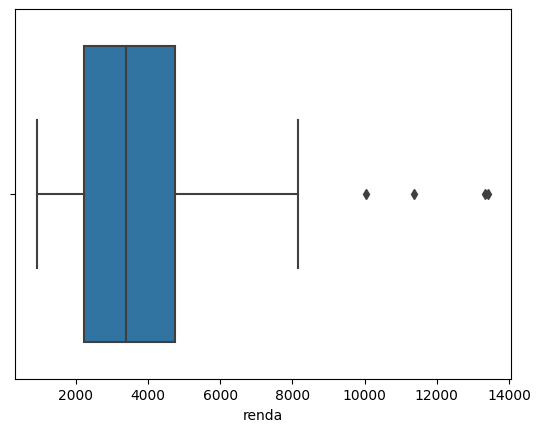

In [73]:
# observa a distribuição de renda para os clientes que são default, possuem veículo e imóvel

sns.boxplot(data=df_quali_ambos,
            x='renda')

### Considerando os dados acima:

i) Ao analisar os dados, não existe correlação direta entre o valor da renda e as variáveis veículos/imóvel. Talvez, se informado os valores desses bens, seria possível traçar uma correlação.

ii) Já, para prever se um cliente será default ou não, é seguro dizer que ter imóvel e/ou veículo é um indicativo de um bom cliente.

### **Voltando a trabalhar com o dataframe que contém datas.**

7) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [84]:
# agrupando novamente pelo index do cliente e tirando a média dos parâmetros

df_2 = df_2015[['index','posse_de_veiculo','posse_de_imovel','mes', 'mau']]
df_2.groupby(by='index').mean()

,posse_de_veiculo,posse_de_imovel,mes,mau
index,,,,
0,1.0,1.0,3.5,0.0
1,0.0,1.0,12.0,0.0
3,1.0,1.0,1.0,0.0
4,1.0,0.0,8.0,0.0
5,1.0,0.0,6.0,0.0
...,...,...,...,...
16636,1.0,1.0,2.0,1.0
16644,0.0,1.0,10.0,1.0
16645,0.0,1.0,11.0,1.0


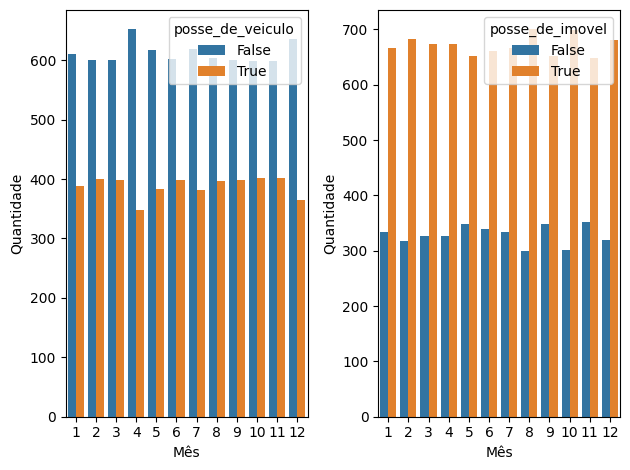

In [85]:
var_qualitativas = ['posse_de_veiculo', 'posse_de_imovel']
index = list(range(0,2))

fig,axs = plt.subplots(ncols=2)

for var,i in zip(var_qualitativas,index):
    
    sns.countplot(data=df_2, 
                x='mes',
                hue=var,
                ax=axs[i])

    axs[i].set_xlabel('Mês')
    axs[i].set_ylabel('Quantidade')
    
plt.tight_layout()

#### Vemos que as variáveis qualitativas se mantém estável durante todo o ano de 2015. Se tornando confiáveis para análise.

8) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

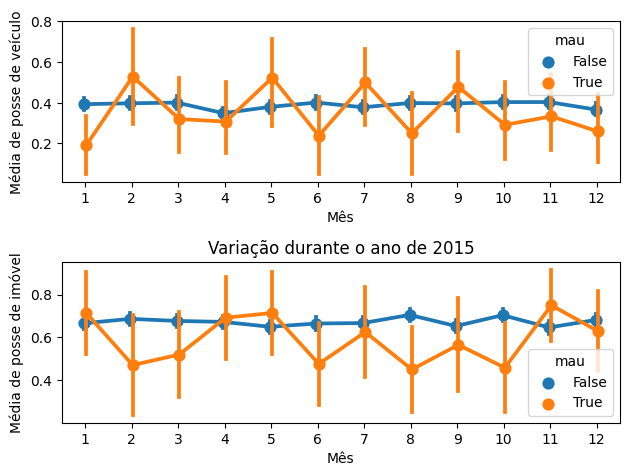

In [89]:
var_qualitativas = ['posse_de_veiculo', 'posse_de_imovel']
index = list(range(0,2))

fig,axs = plt.subplots(nrows=2)
sns.pointplot(x='mes', y='posse_de_veiculo',
              hue='mau',
              data=df_2, 
              dodge=True,
              errorbar = ('ci',95), 
              ax=axs[0])
    
sns.pointplot(x='mes', 
              y='posse_de_imovel', 
              hue='mau',
              data=df_2, 
              dodge=True, 
              errorbar = ('ci',95),
              ax=axs[1])

axs[0].set_xlabel('Mês')
axs[1].set_xlabel('Mês')

axs[0].set_ylabel('Média de posse de veículo')
axs[1].set_ylabel('Média de posse de imóvel')

plt.title('Variação durante o ano de 2015')
plt.tight_layout()


### Ao ser considerado que a média para um cliente não-default se mantém estável, e ainda, sabendo que apenas 2% dos clientes são default, as variáveis qualitativas acima são estavéis e podem ser utilizadas para modelagem.